<a href="https://colab.research.google.com/github/Mioson819/xi-li-so-lieu-chung-khoan/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_B%E1%BA%A3n_sao_c%E1%BB%A7a_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy
!pip install cufflinks
!pip install plotly

     |████████████████████████████████| 4.4 MB 4.5 MB/s 
     |████████████████████████████████| 235 kB 45.7 MB/s 
     |████████████████████████████████| 6.4 MB 32.6 MB/s 
     |████████████████████████████████| 503 kB 48.2 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=38a05e5f1670041f28e08cae57a8d18b0d1e5bf8f8efe7acec5d6e1e7c2d5705
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import investpy
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from pylab import *

In [ ]:
start = "01/01/2013"
end = dt.datetime.now().strftime("%d/%m/%Y")
company = "HPG"
df = investpy.get_stock_historical_data(stock=company, country='vietnam', from_date=start, to_date=end)
df.head()
print(df)
#pd.DataFrame(df).to_csv("HPG.csv")

               Open     High      Low    Close    Volume Currency
Date                                                             
2013-07-05  16290.0  16464.0  16174.0  16232.0   1003210      VND
2013-07-08  16232.0  16290.0  15942.0  16000.0   1038420      VND
2013-07-09  15826.0  16116.0  15826.0  16058.0    176830      VND
2013-07-10  16058.0  16174.0  16000.0  16000.0    379660      VND
2013-07-11  16058.0  16058.0  15884.0  15884.0    549380      VND
...             ...      ...      ...      ...       ...      ...
2022-03-14  47300.0  48200.0  45800.0  45800.0  33845300      VND
2022-03-15  45950.0  46700.0  45450.0  46150.0  20864200      VND
2022-03-16  46900.0  47150.0  46200.0  46200.0  11418800      VND
2022-03-17  46600.0  46700.0  45900.0  45950.0  14957700      VND
2022-03-18  46200.0  46850.0  46050.0  46500.0  17727600      VND

[2172 rows x 6 columns]


In [ ]:
training_set = df.iloc[800:, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 16s 221ms/step - loss: 0.0204
Epoch 2/100
24/24 [==============================] - 6s 271ms/step - loss: 0.0049
Epoch 3/100
24/24 [==============================] - 6s 229ms/step - loss: 0.0033
Epoch 4/100
24/24 [==============================] - 6s 246ms/step - loss: 0.0031
Epoch 5/100
24/24 [==============================] - 4s 168ms/step - loss: 0.0028
Epoch 6/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0026
Epoch 7/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0028
Epoch 8/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0027
Epoch 9/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0026
Epoch 10/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0022
Epoch 11/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0023
Epoch 12/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0021
Epoch 13/100

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[800:, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

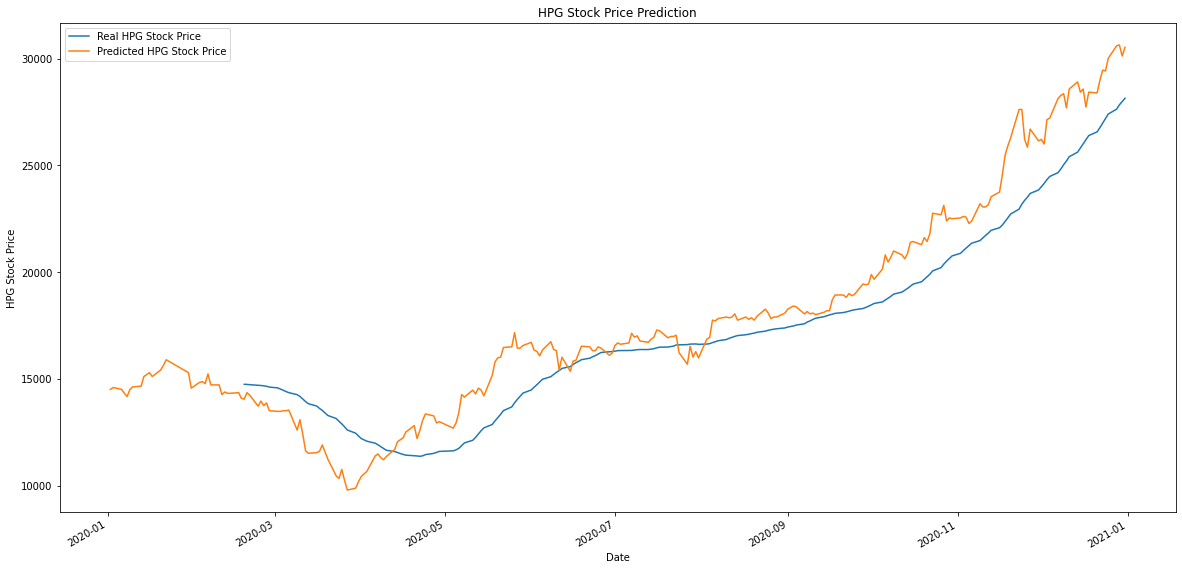

In [ ]:
# Visualising the results
plt.figure(figsize=(20,10))
df['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='Real HPG Stock Price')
df['Close'].loc['2020-01-01':'2021-01-01'].plot(label='Predicted HPG Stock Price')
plt.title('HPG Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('HPG Stock Price')
plt.legend()
plt.show()
#Real HPG Stock Price
#Predicted HPG Stock Price

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2172 entries, 2013-07-05 to 2022-03-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2172 non-null   float64
 1   High      2172 non-null   float64
 2   Low       2172 non-null   float64
 3   Close     2172 non-null   float64
 4   Volume    2172 non-null   int64  
 5   Currency  2172 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 183.3+ KB


In [ ]:
list_banks = ['HPG']
bank_stocks = pd.concat([df],axis=1, keys = list_banks)
bank_stocks.columns.names = ['Bank Name','Stock Info']
import cufflinks as cf
cf.go_offline()
import plotly.io as pio 
pio.renderers.default = "colab"
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(title = "Giá đóng cửa", xTitle = "Năm", yTitle = "Giá")

In [ ]:
df['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[7,14,21],title='SMA CTG')

In [ ]:
df['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')

In [ ]:
df[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

In [ ]:
cf.datagen.ohlc()
df_plot = cf.QuantFig(df,title = 'Biểu đồ hình nến',legend = "Top", name = "Nến")
df_plot.add_bollinger_bands(colors =["red", 'green'])
df_plot.iplot()

In [ ]:
df_plot.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
df_plot.add_rsi(periods=20,color='java')
df_plot.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
df_plot.add_volume()
df_plot.add_macd()
df_plot.iplot()